<a href="https://colab.research.google.com/github/Aftermin/Demo1/blob/main/Python_101_pandas_and_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Pandas

Pandas is a Python library for data analysis that offers flexible data structures like Series and DataFrame, enabling efficient data manipulation and analysis.

Starting with import pandas library into our kernel, we usually import it as pd

In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import numpy as np

## Download data

To simplify data retrieval process on Colab, we check if we are in the Colab environment and download data files from a shared drive and save them in content.

For those using jupyter notebook on the local computer, you can read data directly in the same folder.

In [3]:
!wget https://raw.githubusercontent.com/PacharaWin/CEDT_stat_data_2024/main/HW1/horses_run.csv

--2024-08-08 06:59:32--  https://raw.githubusercontent.com/PacharaWin/CEDT_stat_data_2024/main/HW1/horses_run.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10564287 (10M) [text/plain]
Saving to: ‘horses_run.csv’

horses_run.csv      100%[===================>]  10.07M  --.-KB/s    in 0.04s   

2024-08-08 06:59:32 (256 MB/s) - ‘horses_run.csv’ saved [10564287/10564287]



After downloading csv data, Pandas can be used to read the file as a dataframe (df) - an object type in pandas which is basically a table.

In [4]:
df = pd.read_csv('horses_run.csv')
df.head(5)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


We can list all columns in the dataframe

In [5]:
df.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

And select a specific column

In [ ]:
df['horse_no']

0         1
1         2
2         3
3         4
4         5
         ..
79442    10
79443    11
79444    12
79445    13
79446    14
Name: horse_no, Length: 79447, dtype: int64

The column is another object type called a Series, which is similar to a one-dimensional array

In [ ]:
type(df['horse_id'])

pandas.core.series.Series

We can also create our own dataframe and series

In [ ]:
pd.DataFrame({'Born in':['England','Spain'],'Trophy':[0,5]})

,Born in,Trophy
0,England,0
1,Spain,5


In [ ]:
pd.Series(['Horse B','Horse A','Horse C'])

0    Horse B
1    Horse A
2    Horse C
dtype: object

We can also labels the rows with "index", which can be used to access data (see next section).

In [ ]:
pd.DataFrame({'Born in':['England','Spain'],'Trophy':[0,5]}, index = ['Horse A','Horse B'])

,Born in,Trophy
Horse A,England,0
Horse B,Spain,5


In [ ]:
pd.Series(['Horse B','Horse A','Horse C'], index = ['1st','2nd','3rd'])

1st    Horse B
2nd    Horse A
3rd    Horse C
dtype: object

If not specified, the index defaults to 0,1,2,...

## Selecting data

As shown before, we can select a column in the dataframe

In [ ]:
#df['horse_no']

We can also select multiple columns

In [ ]:
selected_columns = ['race_id', 'horse_id', 'result', 'won']
df[selected_columns]

,race_id,horse_id,result,won
0,0,3917,10,0.0
1,0,2157,8,0.0
2,0,858,7,0.0
3,0,1853,9,0.0
4,0,2796,6,0.0
...,...,...,...,...
79442,6348,1238,6,0.0
79443,6348,985,7,0.0
79444,6348,3147,10,0.0
79445,6348,1982,8,0.0


Another way to select data from a dataframe is to use "iloc" and "loc"

iloc uses the numerical position (row number, column number) of a dataframe

In [6]:
# select row 1, column 3
df.iloc[1,3]

8

In [ ]:
# select row 3-5, column 4-6
df.iloc[3:6,4:7]

,won,lengths_behind,horse_age
3,0.0,6.25,3
4,0.0,3.75,3
5,0.0,1.25,3


loc uses the label (row index, column name)

In [ ]:
# select row 1, column result
df.loc[1,'result']

8

In [ ]:
# select row 3-5 column result,horse_age,horse_country
df.loc[3:5,['result','horse_age','horse_country']]

,result,horse_age,horse_country
3,9,3,SAF
4,6,3,GB
5,3,3,NZ


Note that when selecting row 3-5, we use 3:6 for iloc but 3:5 for loc

In [ ]:
# select all rows, column result,win_odds
df.loc[:,['result','win_odds']]

,result,win_odds
0,10,9.7
1,8,16.0
2,7,3.5
3,9,39.0
4,6,50.0
...,...,...
79442,6,99.0
79443,7,99.0
79444,10,99.0
79445,8,4.6


loc is also used when selecting data with a named index <br>
eg. df.loc["Horse A"]

## Conditional selection

We can select rows or columns based on a condition

In [ ]:
# select all row where horse_country is AUS
df.loc[df['horse_country']=='AUS']

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
7,0,8,2170,1,1.0,0.00,3,AUS,Gelding,60,...,21.87,23.58,23.06,NaN,NaN,82.64,12.0,3.6,47,183
9,0,10,2998,14,0.0,999.00,3,AUS,Mare,60,...,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145
11,0,12,2617,4,0.0,2.25,3,AUS,Gelding,60,...,21.91,23.30,23.52,NaN,NaN,82.98,23.0,8.5,7,115
13,0,14,306,5,0.0,2.75,3,AUS,Gelding,60,...,21.75,23.90,23.66,NaN,NaN,83.08,11.0,3.9,38,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79436,6348,4,1698,2,0.0,0.20,6,AUS,Gelding,92,...,24.06,23.53,22.13,NaN,NaN,95.98,46.0,NaN,60,3
79438,6348,6,1793,12,0.0,4.75,4,AUS,Gelding,90,...,24.06,23.73,23.49,NaN,NaN,96.74,84.0,NaN,138,150
79440,6348,8,932,3,0.0,0.50,5,AUS,Gelding,88,...,24.02,23.73,22.69,NaN,NaN,96.06,6.8,NaN,29,64
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40


To combine multiple conditions, we use "&" for "and" and "|" for "or"

In [ ]:
# horse_country is AUS and horse_type is Mare
df.loc[(df['horse_country']=='AUS') & (df['horse_type']=='Mare')]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
9,0,10,2998,14,0.0,999.00,3,AUS,Mare,60,...,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145
1902,152,9,1419,8,0.0,4.25,3,AUS,Mare,60,...,23.31,22.60,NaN,NaN,NaN,70.83,69.0,15.0,70,34
2180,174,8,1419,8,0.0,3.75,3,AUS,Mare,60,...,22.26,23.02,23.53,NaN,NaN,82.71,70.0,13.0,70,34
3045,243,13,1419,8,0.0,8.00,3,AUS,Mare,60,...,21.21,22.64,NaN,NaN,NaN,57.88,45.0,11.0,70,34
3674,292,11,1419,9,0.0,5.75,3,AUS,Mare,60,...,21.93,23.15,NaN,NaN,NaN,59.36,57.0,12.0,70,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56027,4480,12,1697,5,0.0,3.00,3,AUS,Mare,60,...,22.63,22.77,NaN,NaN,NaN,70.99,8.9,2.8,128,50
56372,4507,11,1697,3,0.0,3.75,3,AUS,Mare,60,...,22.49,23.69,NaN,NaN,NaN,70.41,12.0,3.1,128,50
56494,4517,1,3209,4,0.0,1.25,3,AUS,Mare,60,...,22.45,23.19,NaN,NaN,NaN,70.13,5.2,1.7,117,18
56776,4537,14,1697,9,0.0,4.00,3,AUS,Mare,60,...,22.66,22.94,NaN,NaN,NaN,70.68,16.0,3.7,128,50


In [ ]:
# horse_country is AUS or win_odds > 50
df.loc[(df['horse_country']=='AUS') | (df['win_odds']>50)]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
6,0,7,911,12,0.0,9.50,3,NZ,Gelding,60,...,21.59,23.94,25.09,NaN,NaN,84.15,99.0,28.0,55,149
7,0,8,2170,1,1.0,0.00,3,AUS,Gelding,60,...,21.87,23.58,23.06,NaN,NaN,82.64,12.0,3.6,47,183
9,0,10,2998,14,0.0,999.00,3,AUS,Mare,60,...,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145
11,0,12,2617,4,0.0,2.25,3,AUS,Gelding,60,...,21.91,23.30,23.52,NaN,NaN,82.98,23.0,8.5,7,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


## Adding/modifying data

In [ ]:
# we will work with a copied dataframe for this section
df2 = df.copy()

We can add new columns to the dataframe, or assign values to an existing column

In [ ]:
# with a constant
df2['is_horse'] = 1
# with an iterable
df2['counting'] = range(1,len(df2)+1)

df2.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id,is_horse,counting
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,24.62,NaN,NaN,83.92,9.7,3.7,118,2,1,1
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,23.70,NaN,NaN,83.56,16.0,4.9,164,57,1,2
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,24.22,NaN,NaN,83.40,3.5,1.5,137,18,1,3
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,24.00,NaN,NaN,83.62,39.0,11.0,80,59,1,4
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,23.50,NaN,NaN,83.24,50.0,14.0,9,154,1,5


In [ ]:
df2.loc[df2['won']==0]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id,is_horse,counting
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,24.62,NaN,NaN,83.92,9.7,3.7,118,2,1,1
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,23.70,NaN,NaN,83.56,16.0,4.9,164,57,1,2
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,24.22,NaN,NaN,83.40,3.5,1.5,137,18,1,3
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,24.00,NaN,NaN,83.62,39.0,11.0,80,59,1,4
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,23.50,NaN,NaN,83.24,50.0,14.0,9,154,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,22.52,NaN,NaN,96.17,99.0,NaN,73,40,1,79443
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,22.61,NaN,NaN,96.30,99.0,NaN,164,63,1,79444
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,22.43,NaN,NaN,96.44,99.0,NaN,111,68,1,79445
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,22.29,NaN,NaN,96.34,4.6,NaN,118,95,1,79446


to edit the value of specific rows/columns, use loc

In [ ]:
df2.loc[0,'race_id'] = -1
# we can also combine with conditional selection
df2.loc[df2['horse_country']=='AUS','horse_country'] = 'Kangaroo Land'

df2.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id,is_horse,counting
0,-1,1,3917,10,0.0,8.00,3,Kangaroo Land,Gelding,60,...,24.62,NaN,NaN,83.92,9.7,3.7,118,2,1,1
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,23.70,NaN,NaN,83.56,16.0,4.9,164,57,1,2
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,24.22,NaN,NaN,83.40,3.5,1.5,137,18,1,3
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,24.00,NaN,NaN,83.62,39.0,11.0,80,59,1,4
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,23.50,NaN,NaN,83.24,50.0,14.0,9,154,1,5


## General dataframe function

In [ ]:
type(df)

pandas.core.frame.DataFrame

We can display the shape of dataframe to see number of row and column

In [ ]:
df.shape

(79447, 37)

The df.info() method in pandas provides a concise summary of a DataFrame's structure and contents.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

dtypes of dataframe can display type of data in each column

In [ ]:
df.dtypes

race_id              int64
horse_no             int64
horse_id             int64
result               int64
won                float64
lengths_behind     float64
horse_age            int64
horse_country       object
horse_type          object
horse_rating         int64
horse_gear          object
declared_weight    float64
actual_weight        int64
draw                 int64
position_sec1        int64
position_sec2        int64
position_sec3        int64
position_sec4      float64
position_sec5      float64
position_sec6      float64
behind_sec1        float64
behind_sec2        float64
behind_sec3        float64
behind_sec4        float64
behind_sec5        float64
behind_sec6        float64
time1              float64
time2              float64
time3              float64
time4              float64
time5              float64
time6              float64
finish_time        float64
win_odds           float64
place_odds         float64
trainer_id           int64
jockey_id            int64
d

You can change the data type of a Series using the astype() method.

In [ ]:
df['race_id'].astype(str).info()

<class 'pandas.core.series.Series'>
RangeIndex: 79447 entries, 0 to 79446
Series name: race_id
Non-Null Count  Dtype 
--------------  ----- 
79447 non-null  object
dtypes: object(1)
memory usage: 620.8+ KB


Sometimes, displaying the entire DataFrame by default can show too much data. Using the head() and tail() functions can make it more manageable by showing only the first or last few rows.

In [ ]:
display(df.head(3))
display(df.tail(3))

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18


,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95
79446,6348,14,3491,11,0.0,4.25,3,IRE,Gelding,81,...,24.06,23.77,23.10,NaN,NaN,96.63,99.0,NaN,27,4


We can count each value in the series easily using value_counts()

In [ ]:
df['horse_age'].value_counts()

horse_age
3     61212
4      8007
5      4775
6      2244
2      2098
7       839
8       225
9        41
10        6
Name: count, dtype: int64

Or you can just show the unique value in the series

In [ ]:
df['horse_type'].unique()

array(['Gelding', 'Mare', 'Horse', 'Brown', 'Rig', 'Colt', nan, 'Roan',
       'Filly', 'Grey'], dtype=object)

In [ ]:
df['horse_type'].nunique()

9

Lastly, you can see the basic stat info of your dataframe using describe()

In [ ]:
df.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,3173.352814,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,1833.101494,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,0.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3174.000000,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,4764.500000,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,6348.000000,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


## Basic Statistic

**Descriptive and summary statistics methods**
- **count** <br> Number of non-NA values
- **describe** <br> Compute set of summary statistics for Series or each DataFrame column
- **min, max** <br> Compute minimum and maximum values
- **argmin, argmax** <br> Compute index locations (integers) at which minimum or maximum value obtained, respectively
- **idxmin, idxmax** <br> Compute index labels at which minimum or maximum value obtained, respectively
- **quantile** <br> Compute sample quantile ranging from 0 to 1
- **sum** <br> Sum of values
- **mean** <br> Mean of values
- **median** <br> Arithmetic median (50% quantile) of values
- **mad** <br> Mean absolute deviation from mean value
- **prod** <br> Product of all values
- **var** <br> Sample variance of values
- **std** <br> Sample standard deviation of values
- **skew** <br> Sample skewness (third moment) of values
- **kurt** <br> Sample kurtosis (fourth moment) of values
- **cumsum** <br> Cumulative sum of values
- **cummin, cummax** <br> Cumulative minimum or maximum of values, respectively
- **cumprod** <br> Cumulative product of values
- **diff** <br> Compute first arithmetic difference (useful for time series)
- **pct_change** <br> Compute percent changes

You can show mean of all numeric columns like this

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].mean()

race_id            3173.352814
horse_no              6.905623
horse_id           2204.410525
result                6.838597
won                   0.080053
lengths_behind        6.108901
horse_age             3.339346
horse_rating         61.034904
declared_weight    1104.953568
actual_weight       122.729656
draw                  6.876005
position_sec1         6.849837
position_sec2         6.846791
position_sec3         6.843443
position_sec4         6.945550
position_sec5         6.748388
position_sec6         6.253086
behind_sec1           3.378768
behind_sec2           4.083972
behind_sec3           4.509457
behind_sec4           5.992076
behind_sec5           6.026654
behind_sec6          10.638735
time1                21.135438
time2                22.928985
time3                23.864054
time4                24.039662
time5                24.105221
time6                24.350216
finish_time          85.322914
win_odds             28.812977
place_odds            7.423177
trainer_

Alternatively, you can display only the columns of interest to focus on the relevant data.









In [ ]:
interesting_columns = ['horse_age', 'win_odds']
df[interesting_columns].mean()

horse_age     3.339346
win_odds     28.812977
dtype: float64

others are จับฉ่าย

In [ ]:
df[interesting_columns].count()

horse_age    79447
win_odds     79447
dtype: int64

In [ ]:
df[interesting_columns].min()

horse_age    2.0
win_odds     1.0
dtype: float64

In [ ]:
df[interesting_columns].max()

horse_age    10.0
win_odds     99.0
dtype: float64

In [ ]:
df[interesting_columns].median()

horse_age     3.0
win_odds     15.0
dtype: float64

In [ ]:
df[interesting_columns].std()

horse_age     0.876763
win_odds     30.097375
dtype: float64

In [ ]:
df[interesting_columns].corr()

,horse_age,win_odds
horse_age,1.000000,-0.022757
win_odds,-0.022757,1.000000


In [ ]:
df[numeric_columns].quantile(0.75)

race_id            4764.50
horse_no             10.00
horse_id           3308.00
result               10.00
won                   0.00
lengths_behind        6.75
horse_age             3.00
horse_rating         60.00
declared_weight    1146.00
actual_weight       128.00
draw                 10.00
position_sec1        10.00
position_sec2        10.00
position_sec3        10.00
position_sec4        10.00
position_sec5        10.00
position_sec6         9.00
behind_sec1           5.00
behind_sec2           5.75
behind_sec3           5.75
behind_sec4           6.25
behind_sec5           6.50
behind_sec6           7.75
time1                25.36
time2                23.52
time3                24.41
time4                24.56
time5                24.63
time6                24.82
finish_time         100.78
win_odds             38.00
place_odds            8.60
trainer_id          118.00
jockey_id           138.00
Name: 0.75, dtype: float64

## Sorting

There are several sorting functions available for you to organize the data.

In [ ]:
df.sort_values(by='actual_weight')

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
1557,125,14,3869,8,0.0,3.25,3,NZ,Gelding,60,...,22.57,24.85,25.22,24.16,NaN,110.92,57.0,15.0,117,40
4169,331,14,1207,9,0.0,8.75,3,AUS,Gelding,60,...,22.80,23.81,24.77,24.78,NaN,110.87,11.0,4.9,137,50
5098,408,14,2970,2,0.0,0.75,3,AUS,Gelding,60,...,22.44,24.48,23.33,NaN,NaN,84.03,18.0,7.2,137,50
6145,493,14,1441,2,0.0,0.50,3,NZ,Gelding,60,...,22.50,23.62,23.90,NaN,NaN,83.68,85.0,19.0,54,175
3459,274,11,2970,3,0.0,0.20,3,AUS,Gelding,60,...,22.70,23.27,NaN,NaN,NaN,69.81,9.2,3.4,137,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58643,4690,1,779,3,0.0,1.25,3,NZ,Gelding,60,...,23.54,24.14,23.40,23.43,NaN,109.27,14.0,4.4,27,138
58631,4689,3,807,6,0.0,5.00,4,IRE,Gelding,60,...,22.09,23.90,23.56,NaN,NaN,83.40,5.2,1.8,27,138
58603,4687,1,1809,9,0.0,5.50,3,AUS,Gelding,60,...,22.47,23.51,NaN,NaN,NaN,70.28,3.4,1.4,55,110
58758,4699,2,163,8,0.0,5.25,5,AUS,Gelding,60,...,24.54,24.70,24.71,NaN,NaN,102.31,11.0,3.3,80,110


In [ ]:
df[['actual_weight']].sort_values(by='actual_weight', ascending=False)

,actual_weight
0,133
74824,133
74795,133
12544,133
48380,133
...,...
4277,103
10924,103
5098,103
72849,103


In [ ]:
df[['actual_weight','declared_weight']].sort_values(by=['actual_weight','declared_weight'], ascending=[True,False])

,actual_weight,declared_weight
72274,103,1221.0
4453,103,1197.0
9716,103,1190.0
72314,103,1175.0
4642,103,1163.0
...,...,...
78070,133,941.0
11204,133,938.0
3314,133,935.0
12105,133,934.0


## Grouping

**Optimized groupby methods**
- **count** <BR> Number of non-NA values in the group
- **sum** <BR> Sum of non-NA values
- **mean** <BR> Mean of non-NA values
- **median** <BR> Arithmetic median of non-NA values
- **std, var** <BR> Unbiased (n – 1 denominator) standard deviation and variance
- **min, max** <BR> Minimum and maximum of non-NA values
- **prod** <BR> Product of non-NA values
- **first, last** <BR> First and last non-NA values

In [ ]:
# show sum of winning, group by horse_id
df.groupby('horse_id')['won'].sum().head(5)

horse_id
0    4.0
1    1.0
2    2.0
3    0.0
4    1.0
Name: won, dtype: float64

In [ ]:
# convert to DataFrame
df.groupby('horse_id')['won'].sum().reset_index(name='sum_winning')

,horse_id,sum_winning
0,0,4.0
1,1,1.0
2,2,2.0
3,3,0.0
4,4,1.0
...,...,...
4400,4400,3.0
4401,4401,0.0
4402,4402,5.0
4403,4403,1.0


## Data Cleansing

In [ ]:
df.isnull()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
79443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
79444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
79445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False


In [ ]:
df.isnull().sum()

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
horse_gear             0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4              33221
time5              69368
time6              78151
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
dtype: int64

Some columns may contain too many null values, so we may need to drop them.

In [ ]:
df.drop(columns = ['behind_sec5', 'behind_sec6'])

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


You can drop NaN, if you want.

In [ ]:
df.dropna()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
1133,93,1,2962,3,0.0,2.75,3,NZ,Gelding,60,...,24.54,25.91,26.03,24.35,24.21,139.81,6.0,1.8,4,69
1134,93,2,1023,4,0.0,5.00,3,AUS,Gelding,60,...,24.42,25.95,25.47,23.51,25.05,140.17,11.0,3.2,60,64
1135,93,3,3740,8,0.0,6.75,3,AUS,Gelding,60,...,24.30,25.91,25.99,23.55,25.32,140.44,14.0,4.5,47,151
1136,93,4,133,9,0.0,7.75,3,NZ,Gelding,60,...,24.30,25.75,26.11,24.39,25.41,140.61,7.5,2.8,75,18
1137,93,5,134,5,0.0,5.25,3,AUS,Gelding,60,...,24.62,25.95,25.95,24.11,24.31,140.19,5.4,1.6,55,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75753,6054,8,609,2,0.0,4.75,4,IRE,Gelding,66,...,23.28,24.84,26.08,24.51,23.70,136.92,5.6,1.9,80,157
75754,6054,9,2529,10,0.0,16.25,4,AUS,Gelding,65,...,22.84,24.76,26.08,24.87,25.57,138.75,27.0,7.5,164,149
75755,6054,10,246,7,0.0,8.25,3,AUS,Gelding,64,...,23.20,25.04,25.84,24.59,24.13,137.47,8.0,2.3,118,50
75756,6054,11,1237,11,0.0,22.25,5,NZ,Gelding,63,...,23.16,25.08,26.08,25.19,25.79,139.73,43.0,8.5,111,162


Or just drop NaN only in selected columnn.

In [ ]:
df.dropna(subset = ['place_odds'])

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76706,6128,10,1153,11,0.0,8.25,4,NZ,Gelding,65,...,22.03,23.97,23.41,NaN,NaN,82.87,33.0,5.7,118,40
76707,6128,11,1925,6,0.0,5.50,6,GB,Gelding,64,...,22.07,23.85,22.80,NaN,NaN,82.42,99.0,14.0,73,161
76708,6128,12,2531,4,0.0,4.50,3,AUS,Gelding,63,...,21.91,24.05,22.95,NaN,NaN,82.25,8.2,2.0,138,10
76709,6128,13,212,9,0.0,7.00,4,AUS,Horse,63,...,21.99,23.89,23.28,NaN,NaN,82.66,59.0,9.9,7,23


How about impute Nan with others value?

In [ ]:
df.fillna('Missing')

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,Missing,Missing,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.7,Missing,Missing,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,Missing,Missing,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.0,Missing,Missing,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.5,Missing,Missing,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,23.98,23.53,22.52,Missing,Missing,96.17,99.0,Missing,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,24.10,23.77,22.61,Missing,Missing,96.30,99.0,Missing,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,24.06,23.37,22.43,Missing,Missing,96.44,99.0,Missing,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,24.02,23.45,22.29,Missing,Missing,96.34,4.6,Missing,118,95


Sometimes, you can fill missing values with the mean of that column

In [ ]:
df['place_odds'].fillna(df['place_odds'].mean())

0         3.700000
1         4.900000
2         1.500000
3        11.000000
4        14.000000
           ...    
79442     7.423177
79443     7.423177
79444     7.423177
79445     7.423177
79446     7.423177
Name: place_odds, Length: 79447, dtype: float64

## Save dataframe as csv file

In [ ]:
df.to_csv('horses_run_modified.csv', index=False)

# Visualization with Matplotlib

Matplotlib is a graph plotting library in python which is useful for making quick and easy visualization.

To get started, we'll import matplotlib.pyplot as plt

In [ ]:
# pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

pyplot is the submodule where most of matplotlib's utilities are, which is why we usually import matplotlib.pyplot instead of just matplotlib  

In [ ]:
# let's also import numpy
import numpy as np

## Simple plot(plt.plot)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Given the data x and y, we can make a plot of x and y as follows:

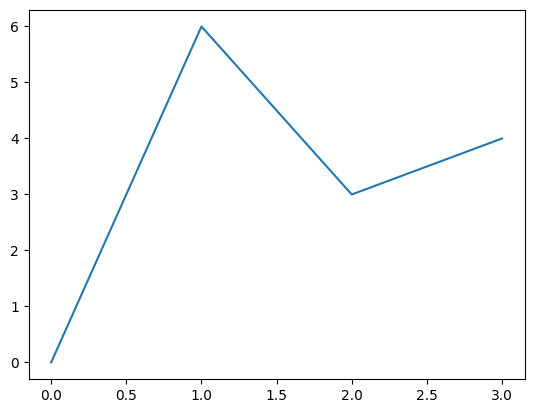

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 6, 3, 4])

plt.plot(x, y)
plt.show()

We can add parameters to modify how the plot looks

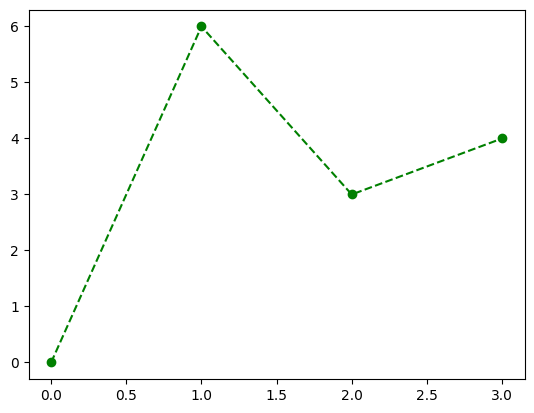

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 6, 3, 4])

plt.plot(x, y, color = 'green', marker = 'o', linestyle = 'dashed')
plt.show()

Here, "color" sets the color of the plot, "marker" sets the shape of the point, and "linestyle" sets the shape of the line <br>

We can also do multiple plots in the same graph

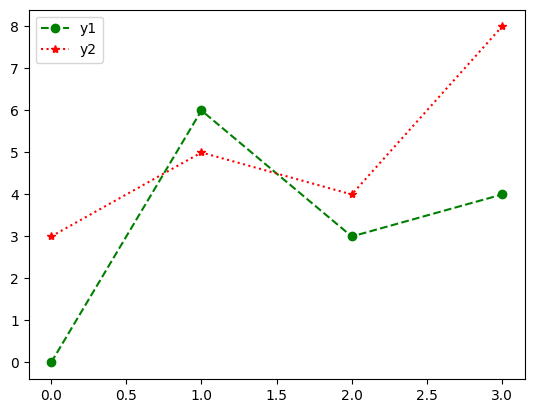

In [ ]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0, 6, 3, 4])
y2 = np.array([3, 5, 4, 8])

plt.plot(x, y1, color = 'green', marker = 'o', linestyle = 'dashed', label = 'y1')
plt.plot(x, y2, color = 'red', marker = '*', linestyle = 'dotted', label = 'y2')

plt.legend()

plt.show()

The "label" parameter sets the name of the plot, and plt.legend() tells matplotlib that we want to display the labels

Addtionally, we can add the plot's name and the axes' label

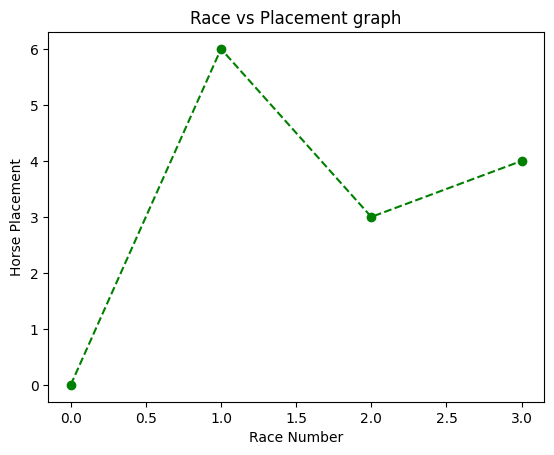

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 6, 3, 4])

plt.plot(x, y, color = 'green', marker = 'o', linestyle = 'dashed')

plt.title('Race vs Placement graph')
plt.xlabel('Race Number')
plt.ylabel('Horse Placement')

plt.show()

There are many ways to customize your plot, so I suggest browsing through the Matplotlib documentation and trying it out for yourself.

Next, as an example, let's make use of our dataset from the pandas section

We'll plot the relationship between the result and the finish time in race#0

In [ ]:
df = pd.read_csv('horses_run.csv')
df.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


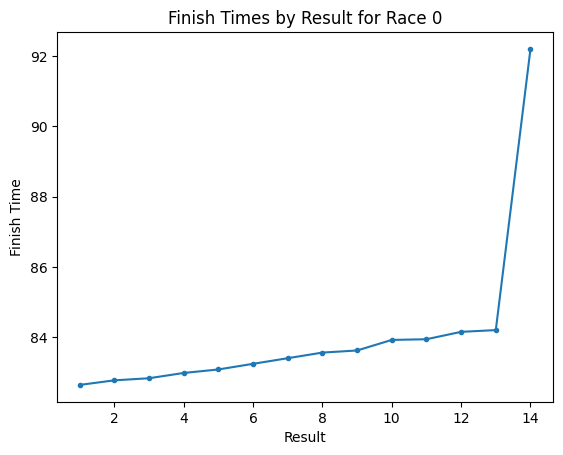

In [ ]:
df_race0 = df.loc[df['race_id']==0,['result','finish_time']] # select data from race 0 and keep only result and finish_time
sorted_df = df_race0.sort_values(['result']) # sort the data by result
x = sorted_df['result'] # assigns horse_rating to x
y = sorted_df['finish_time'] # assigns place_odds to y

plt.plot(x, y,marker='.')

plt.title('Finish Times by Result for Race 0')
plt.xlabel('Result')
plt.ylabel('Finish Time')

plt.show()

Alternatively, we can also use the plot function of dataframes

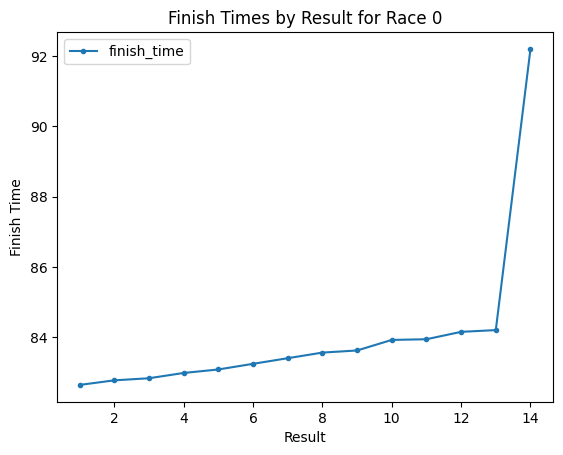

In [ ]:
sorted_df.plot(x='result',y='finish_time',marker='.')

plt.title('Finish Times by Result for Race 0')
plt.xlabel('Result')
plt.ylabel('Finish Time')

plt.show()

## Other types of plots

### scatter plot
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

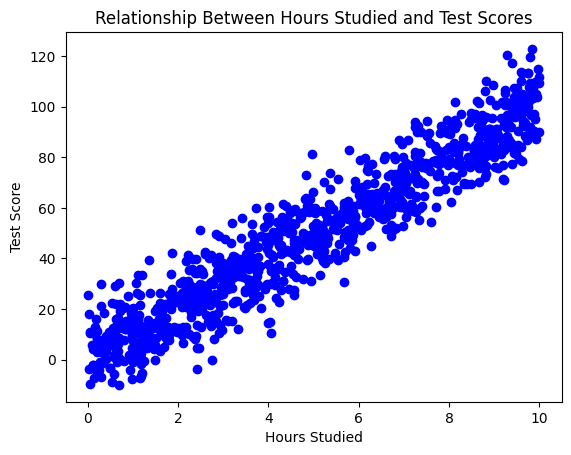

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
hours_studied = np.random.uniform(0, 10, 1000)
test_scores = hours_studied * 10 + np.random.normal(0, 10, 1000)

# Create scatter plot
plt.scatter(hours_studied, test_scores, color='blue')

plt.title('Relationship Between Hours Studied and Test Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')

plt.show()

### bar plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Let's compare the finish time of horses from each country with a bar plot

In [ ]:
grouped_df = df.groupby('horse_country')['finish_time'].mean().reset_index(name='avg_finish_time')
grouped_df.head()

,horse_country,avg_finish_time
0,ARG,89.532992
1,AUS,82.010278
2,BRZ,100.480556
3,CAN,85.198791
4,FR,95.287359


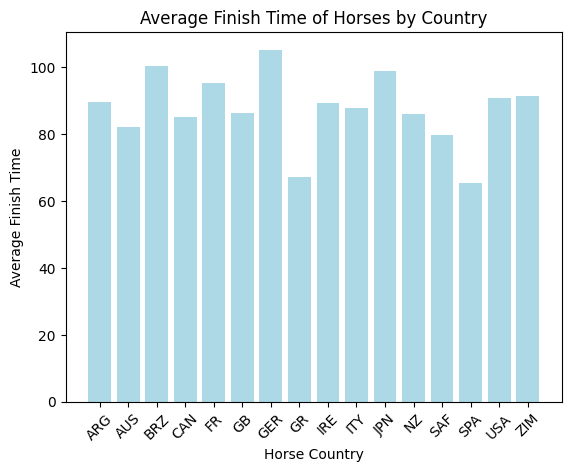

In [ ]:
x = grouped_df['horse_country']
y = grouped_df['avg_finish_time']

plt.bar(x, y, color='lightblue')

plt.title('Average Finish Time of Horses by Country')
plt.xlabel('Horse Country')
plt.ylabel('Average Finish Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

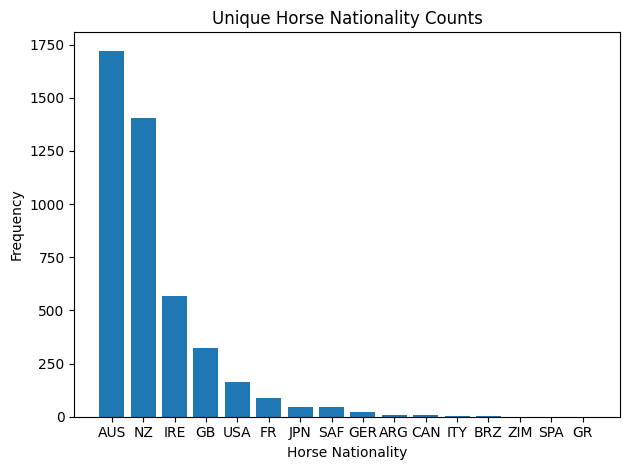

In [ ]:
unique_horses_df = df.groupby('horse_id').first()
nationality_counts = unique_horses_df['horse_country'].value_counts()

plt.bar(nationality_counts.index, nationality_counts.values)
plt.title('Unique Horse Nationality Counts')
plt.xlabel('Horse Nationality')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### histogram

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Finally, we can use plt.hist() to show the histogram of a data

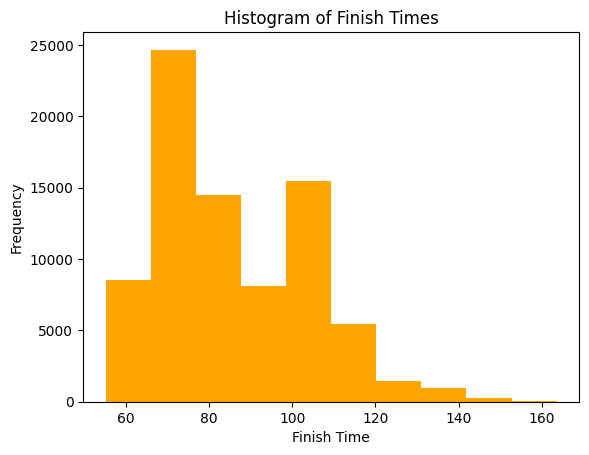

In [ ]:
plt.hist(df['finish_time'],bins=10,color='orange')

plt.title('Histogram of Finish Times')
plt.xlabel('Finish Time')
plt.ylabel('Frequency')

plt.show()